In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# New Section

In [18]:
# Load the training dataset
train_file_path = "01 Train Data.csv"
train_data = pd.read_csv(train_file_path)

In [19]:
# Ignore rows with null/empty values in Placement Status column
train_data = train_data.dropna(subset=['Placement Status'])


In [20]:
# EDA for the selected columns
columns_for_analysis = ['CGPA', 'Speaking Skills', 'ML Knowledge', 'Placement Status']
eda_data = train_data[columns_for_analysis]

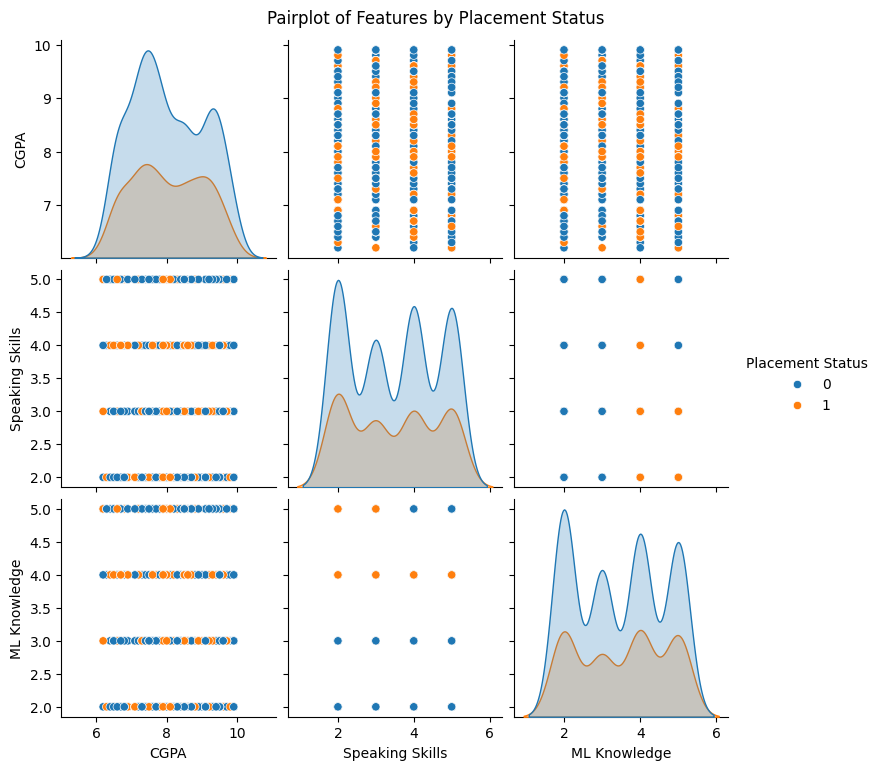

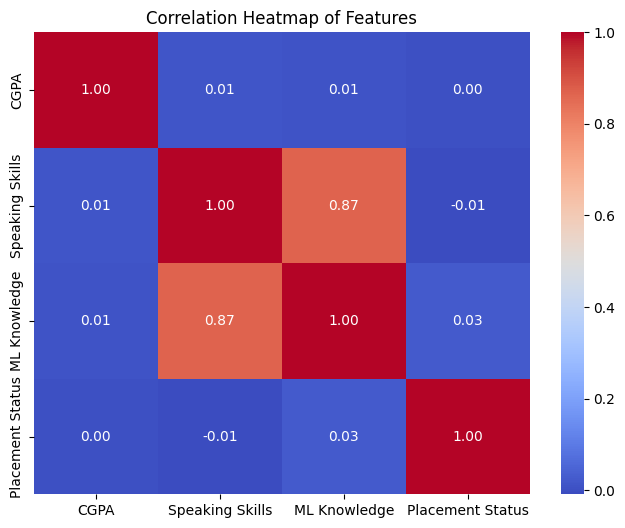

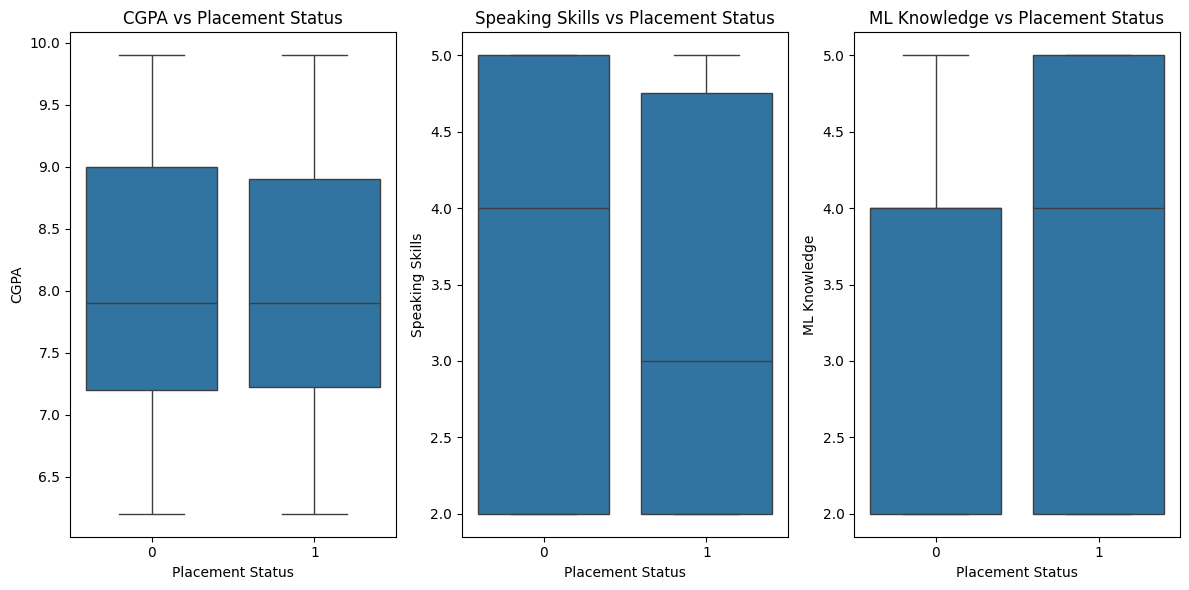

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_file_path = "01 Train Data.csv"
train_data = pd.read_csv(train_file_path)

# Ignore rows with null/empty values in Placement Status column
train_data = train_data.dropna(subset=['Placement Status'])

# Define columns for visualization
columns_for_visualization = ['CGPA', 'Speaking Skills', 'ML Knowledge', 'Placement Status']

# Encode 'Placement Status' column
label_encoder = LabelEncoder()
train_data['Placement Status'] = label_encoder.fit_transform(train_data['Placement Status'])

# Create a pairplot
sns.pairplot(train_data[columns_for_visualization], hue='Placement Status', diag_kind='kde')
plt.suptitle("Pairplot of Features by Placement Status", y=1.02)
plt.show()

# Create a heatmap to show correlation between features and Placement Status
plt.figure(figsize=(8, 6))
corr = train_data[columns_for_visualization].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# Create boxplots to show the distribution of each feature with respect to Placement Status
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Placement Status', y='CGPA', data=train_data)
plt.title('CGPA vs Placement Status')

plt.subplot(1, 3, 2)
sns.boxplot(x='Placement Status', y='Speaking Skills', data=train_data)
plt.title('Speaking Skills vs Placement Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='Placement Status', y='ML Knowledge', data=train_data)
plt.title('ML Knowledge vs Placement Status')

plt.tight_layout()
plt.show()



In [22]:
# Define independent variables (features) and dependent variable (target)
X_train = train_data[['CGPA', 'Speaking Skills', 'ML Knowledge']]
y_train = train_data['Placement Status']

In [23]:
# Train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_train)
logreg_accuracy = accuracy_score(y_train, logreg_predictions)

In [25]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_train)
rf_accuracy = accuracy_score(y_train, rf_predictions)

In [26]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_train)
svm_accuracy = accuracy_score(y_train, svm_predictions)

In [27]:
# Print accuracy for each model
print(f"Logistic Regression Model Accuracy: {logreg_accuracy:.2f}")
print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")
# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_model.predict(X_train)
best_rf_accuracy = accuracy_score(y_train, best_rf_predictions)
print("Best Random Forest Model Accuracy:", best_rf_accuracy)


Logistic Regression Model Accuracy: 0.67
Decision Tree Model Accuracy: 0.72
Random Forest Model Accuracy: 0.72
SVM Model Accuracy: 0.67
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best Random Forest Model Accuracy: 0.7222222222222222


In [28]:
# CNN Model
X_cnn_train = train_data[['CGPA', 'Speaking Skills', 'ML Knowledge']].values.reshape(-1, 3, 1, 1)
y_cnn_train = pd.get_dummies(train_data['Placement Status']).values

cnn_model = Sequential([
    Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(3, 1, 1)),
    MaxPooling2D(pool_size=(1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_cnn_train, y_cnn_train, epochs=10, batch_size=32)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_cnn_train, y_cnn_train)
print("CNN Model Accuracy:", cnn_accuracy)

Epoch 1/10
35/35 [==============================] - 2s 4ms/step - loss: 0.6421 - accuracy: 0.6630
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6676
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.6685
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6410 - accuracy: 0.6667
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.6667
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6676
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6685
Epoch 8/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6676
Epoch 9/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6667
Epoch 10/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6667
CNN Model Accuracy:

In [29]:
# Load the test dataset
test_file_path = "02 Test Data.csv"
test_data = pd.read_csv(test_file_path)

# Extract features from the test dataset
X_test_data = test_data[['CGPA', 'Speaking Skills', 'ML Knowledge']]

# Use the trained Random Forest model to make predictions
rf_test_predictions = rf_model.predict(X_test_data)

# Fill the empty 'Placement Status' column in the test dataset with predictions
test_data['Placement Status'] = rf_test_predictions

# Save the updated test dataset with filled 'Placement Status' column
updated_test_file_path = "02 Test Data Updated.csv"
test_data.to_csv(updated_test_file_path, index=False)

print("Test dataset updated and saved with Random Forest predictions.")

Test dataset updated and saved with Random Forest predictions.
